## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df_raw = pd.read_csv('/content/games.csv')
df_raw.tail()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4
20057,N8G2JHGG,True,1.499643e+12,1.499644e+12,78,mate,black,10+0,jamboger,1235,ffbob,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3


### Checking for nulls

In [ ]:
df_raw.isnull().sum(axis = 0)

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
base_time         0
dtype: int64

## Understanding data

In [ ]:
#Number of different openings
df_raw.opening_name.nunique()

1477

In [ ]:
# Top 10 most used openings
df_raw["opening_name"].value_counts().head(10)

Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
French Defense: Knight Variation                 271
Scotch Game                                      271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Name: opening_name, dtype: int64

In [ ]:
#How many wins white has when the opening is Queen's Gambit?

df_raw.loc[(df_raw['winner'] == 'white') & (df_raw['opening_name'] == "Queen's Gambit")].count()

id                10
rated             10
created_at        10
last_move_at      10
turns             10
victory_status    10
winner            10
increment_code    10
white_id          10
white_rating      10
black_id          10
black_rating      10
moves             10
opening_eco       10
opening_name      10
opening_ply       10
base_time         10
dtype: int64

In [ ]:
# FUNCTIONS TO EASE PLOTTING

def plot_hist(df_name, column, title="all"):
    plt.hist(df_name[column],density=True)
    plt.title(title)
    plt.show()

def plot_bar(df_name, column, sort=False, title="all"):
    if sort:
        data_all = df_name[column].value_counts().sort_index()
    else:
        data_all = df_name[column].value_counts()
    plt.bar(data_all.index,data_all)
    plt.title(title)
    plt.show()

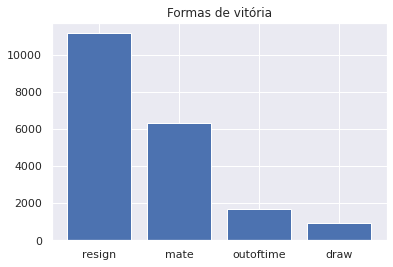

In [ ]:
plot_bar(df_raw, "victory_status", title="Formas de vitória")

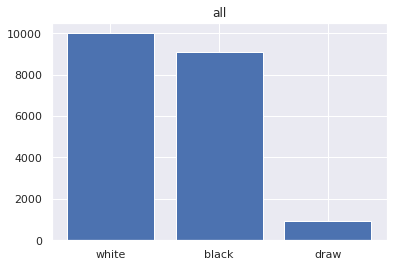

In [ ]:
plot_bar(df_raw, "winner")

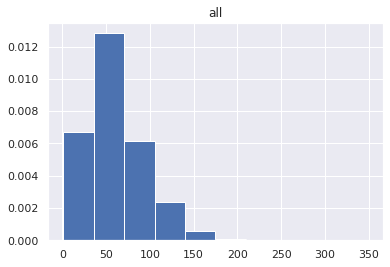

In [ ]:
plot_hist(df_raw, "turns")

### Pearson correlation test to check whether turns increase linealy with rating.

In [ ]:
def pearson_correl (column1, column2):
  from scipy.stats import pearsonr
  data1 = column1
  data2 = column2
  stat, p = pearsonr(data1, data2)
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
	    print('Probably independent')
  else:
	    print('Probably dependent')

In [ ]:
pearson_correl(df_raw.turns, df_raw.white_rating)

stat=0.130, p=0.000
Probably dependent


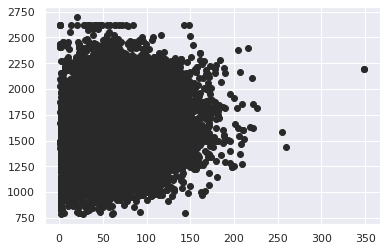

In [ ]:
plt.scatter(data1, data2, c="#292929")

As we can see above, there is no clear tendency in the samples, only a huge blob of data with some outliers, which explains the "p" value being 0.000